In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
cd "/content/gdrive/My Drive"

/content/gdrive/My Drive


In [ ]:
!pip install face_recognition

     |████████████████████████████████| 100.2MB 42kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566172 sha256=3a452f98fad9fcd8b1dceddd3dced4699776eeb08ed6715455efddc8419616d0
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


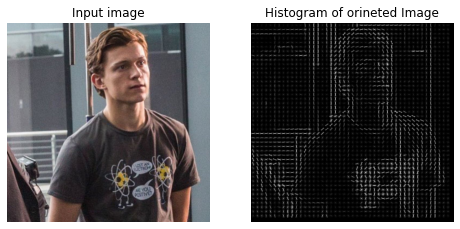

In [ ]:
import matplotlib.pyplot as plt

from skimage.feature import hog
from skimage import data,exposure
import cv2


image=cv2.imread('tom1.jpg')
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)




fd,hog_image=hog(image,orientations=8,pixels_per_cell=(16,16),
                 cells_per_block=(1,1),visualize=True,multichannel=True)


fig,(ax1,ax2)=plt.subplots(1,2,figsize=(8,4),sharex=True,sharey=True)

ax1.axis('off')
ax1.imshow(image,cmap=plt.cm.gray)
ax1.set_title('Input image')

hog_image_rescaled=exposure.rescale_intensity(hog_image,in_range=(0,10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled,cmap=plt.cm.gray)
ax2.set_title('Histogram of orineted Image')
plt.show()

In [ ]:
len(fd)

1768

In [ ]:
image.shape

(283, 220, 3)

In [ ]:
import face_recognition
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
import numpy as np
import cv2
%matplotlib inline


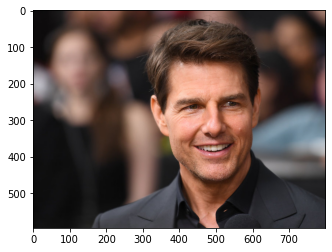

In [ ]:
image=cv2.imread('srk.jpg')
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [ ]:
face_locations=face_recognition.face_locations(image)
number_of_faces=len(face_locations)
print("Found {} faces in immage:".format(number_of_faces)) 

Found 1 faces in immage:


A face is located at pixel location top:349,left:201,bottom:617,Right:468


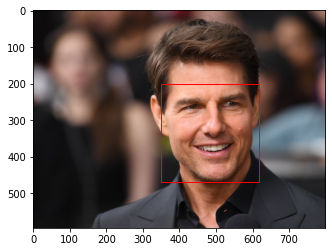

In [ ]:
plt.imshow(image)
ax=plt.gca()

for face_location in face_locations:
  top,right,bottom,left=face_location
  x,y,w,h=left,top,right,bottom
  print("A face is located at pixel location top:{},left:{},bottom:{},Right:{}".format(x,y,w,h))

  rect=Rectangle((x,y),w-x,h-y,fill=False,color='red')

  ax.add_patch(rect)



plt.show()







In [ ]:
import face_recognition
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
import numpy as np
import cv2
%matplotlib inline

In [ ]:
#LOADING KNOWN IMAGES TO CREATE A DATABASE OF KNOWN IMAGES
image =cv2.imread('tom.jpg')
tom=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)



image =cv2.imread('ledger.jpg')
ledger=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)



image =cv2.imread('taylor.jpg')
taylor=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

image =cv2.imread('salena.jpg')
salena=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

image =cv2.imread('cruise.jpg')
cruise=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

image =cv2.imread('srk.jpg')
srk=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)


In [ ]:
tom_encoding=face_recognition.face_encodings(tom)[0]
ledger_encoding=face_recognition.face_encodings(ledger)[0]
taylor_encoding=face_recognition.face_encodings(taylor)[0]
salena_encoding=face_recognition.face_encodings(salena)[0]
cruise_encoding=face_recognition.face_encodings(cruise)[0]
srk_encoding=face_recognition.face_encodings(srk)[0]
#DATABASE OF ALL KNOWN ENCODINGS
known_face_encodings=[
                      tom_encoding,
                      ledger_encoding,
                      taylor_encoding,
                      salena_encoding,
                      cruise_encoding,
                      srk_encoding
]


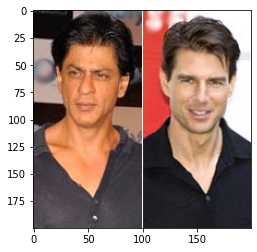

In [ ]:
#LOAD THE TEST IMAGE YOU WANT TO CHECK
image=cv2.imread('cruise1.jpg')
unknown_image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(unknown_image)


#GETTING THE ENCODING FOR THE UNKNOWN IMAGE TO CHECK WITH THE DATABASE
unknown_face_encodings=face_recognition.face_encodings(unknown_image)

In [ ]:
from scipy.spatial import distance

for unknown_face_encoding in unknown_face_encodings:


  results=[]
  for known_face_encoding in known_face_encodings:
    d=distance.euclidean(known_face_encoding,unknown_face_encoding)
    results.append(d)
  threshold=0.6
  results=np.array(results)<=threshold
  name='Unknown'
  

  if results[0]:
    name="Tom"
  elif results[1]:
    name='Heath Ledger'
  elif results[2]:
    name='Taylor Swift'
  elif results[3]:
    name='Salena Gomez'
  elif results[4]:
    name='Tom Cruise'
  elif results[5]:
    name='Sharukhan'

  print(f"Found {name} in the photo")

Found Tom Cruise in the photo
Found Sharukhan in the photo
